# **Visualizing Dummy Data**

# **Dummy Data**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
x=np.array([1,2,3,4,5]).reshape(-1,1)
y=np.array([3,6,13,28,55])

# **LinearRegression**

In [ ]:
linear_model=LinearRegression()
linear_model.fit(x,y)
y_pred_linear=linear_model.predict(x)


## **polynomial Regression(degree 2)**

In [ ]:
poly=PolynomialFeatures(degree=2)
X_poly=poly.fit_transform(x)
poly_model=LinearRegression()
poly_model.fit(X_poly,y)
y_pred_poly=poly_model.predict(X_poly)

# **Plot**

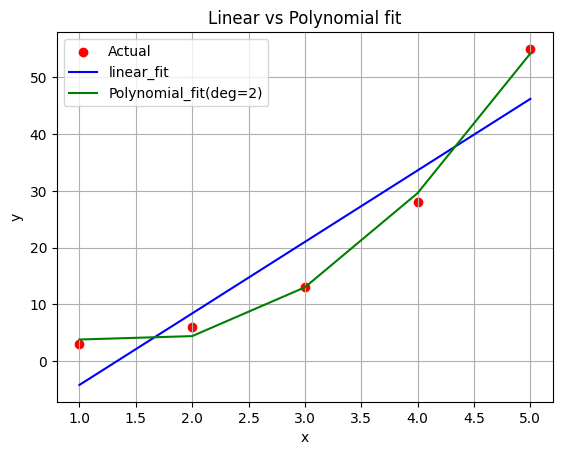

In [ ]:
plt.scatter(x,y,color='red',label='Actual')
plt.plot(x,y_pred_linear,label='linear_fit',color='blue')
plt.plot(x,y_pred_poly,label='Polynomial_fit(deg=2)',color='green')
plt.title('Linear vs Polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

# **Read DataSet: Salary Prediction**

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score

# **Load dataset**

In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Naresh312143/mahalingpur-python-ml/refs/heads/main/Salary_Data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6704 entries, 0 to 6703
Data columns (total 2 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Years of Experience  6701 non-null   float64
 1   Salary               6699 non-null   float64
dtypes: float64(2)
memory usage: 104.9 KB


In [ ]:
df.isnull().sum()

,0
Years of Experience,3
Salary,5


In [ ]:
df.dropna(inplace=True)
df.isnull().sum()

,0
Years of Experience,0
Salary,0


# **Train-Test split**

In [ ]:
x=df[["Years of Experience"]]
y=df["Salary"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

## **Linear Regression**

# **Train linear regression**

In [ ]:
linear_model=LinearRegression()
linear_model.fit(x_train,y_train)
y_pred_linear=linear_model.predict(x_test)




## **Metrics**

In [ ]:
mse_linear=mean_squared_error(y_test,y_pred_linear)
rmse_linear=np.sqrt(mse_linear)
r2_linear=r2_score(y_test,y_pred_linear)
print("Linear Regression Metrics:")
print("MSE:",mse_linear)
print("RMSE:",rmse_linear)
print("R2 Score:",r2_linear)


Linear Regression Metrics:
MSE: 946833177.7094355
RMSE: 30770.654489455297
R2 Score: 0.6669549610495003


# **polynomial Regression (Degree 2 and 4)**

# **Degree2**

In [ ]:
poly2=PolynomialFeatures(degree=2)
x_train_poly2=poly2.fit_transform(x_train)
x_test_poly2=poly2.transform(x_test)
poly2_model=LinearRegression()
poly2_model.fit(x_train_poly2,y_train)
y_pred_poly2=poly2_model.predict(x_test_poly2)

In [ ]:
x_train_poly2

array([[  1.,   3.,   9.],
       [  1.,   6.,  36.],
       [  1.,  10., 100.],
       ...,
       [  1.,   7.,  49.],
       [  1.,   8.,  64.],
       [  1.,   2.,   4.]])

In [ ]:
x_test_poly2

array([[ 1.,  2.,  4.],
       [ 1.,  8., 64.],
       [ 1.,  3.,  9.],
       ...,
       [ 1.,  1.,  1.],
       [ 1.,  3.,  9.],
       [ 1.,  0.,  0.]])

###**Metrics**

In [ ]:
mse_poly2=mean_squared_error(y_test,y_pred_poly2)
rmse_poly2=np.sqrt(mse_poly2)
r2_poly2=r2_score(y_test,y_pred_poly2)

### **Degree4**

In [ ]:
poly4=PolynomialFeatures(degree=4)
x_train_poly4=poly4.fit_transform(x_train)
x_test_poly4=poly4.transform(x_test)
poly4_model=LinearRegression()
poly4_model.fit(x_train_poly4,y_train)
y_pred_poly4=poly4_model.predict(x_test_poly4)



In [ ]:
x_train_poly4

array([[1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 6.000e+00, 3.600e+01, 2.160e+02, 1.296e+03],
       [1.000e+00, 1.000e+01, 1.000e+02, 1.000e+03, 1.000e+04],
       ...,
       [1.000e+00, 7.000e+00, 4.900e+01, 3.430e+02, 2.401e+03],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01]])

In [ ]:
x_test_poly4

array([[1.000e+00, 2.000e+00, 4.000e+00, 8.000e+00, 1.600e+01],
       [1.000e+00, 8.000e+00, 6.400e+01, 5.120e+02, 4.096e+03],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       ...,
       [1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00, 1.000e+00],
       [1.000e+00, 3.000e+00, 9.000e+00, 2.700e+01, 8.100e+01],
       [1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00]])

### **Metrics**

In [ ]:
mse4=mean_squared_error(y_test,y_pred_poly4)
rmse4=np.sqrt(mse4)
r2_poly4=r2_score(y_test,y_pred_poly4)
print("Polynomial Regression Metrics:")
print("Degree 2:")
print("MSE:",mse2)
print("RMSE:",rmse2)
print("R2 Score:",r2_poly2)
print("\n")
print("Degree 4:")
print("MSE:",mse4)
print("RMSE:",rmse4)
print("R2 Score:",r2_poly4)

Polynomial Regression Metrics:
Degree 2:
MSE: 726857249.7211918
RMSE: 26960.290238074067
R2 Score: 0.7443306732971963


Degree 4:
MSE: 720033651.6859531
RMSE: 26833.44278481524
R2 Score: 0.7467308484568018


# **Visualization of All Models**

###**Generate smooth line for prediction**

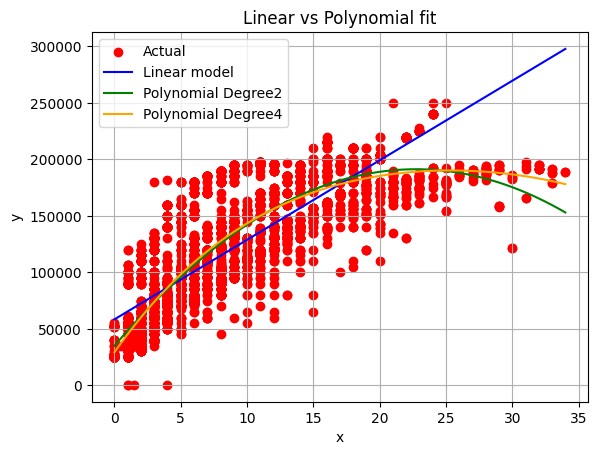

In [ ]:
x_range=np.linspace(x.min(),x.max(),100).reshape(-1,1)

#Create DataFrame with Column name
x_range_df=pd.DataFrame(x_range,columns=['Years of Experience'])

# Transform using polynomial features
x_range_poly2=poly2.transform(x_range_df)
x_range_poly4=poly4.transform(x_range_df)

# Predict using models
y_range_linear=linear_model.predict(x_range_df)
y_range_poly2=poly2_model.predict(x_range_poly2)
y_range_poly4=poly4_model.predict(x_range_poly4)

#plot
plt.scatter(x,y,color='red',label='Actual')
plt.plot(x_range,y_range_linear,label='Linear model',color='blue')
plt.plot(x_range,y_range_poly2,label='Polynomial Degree2',color='green')
plt.plot(x_range,y_range_poly4,label='Polynomial Degree4',color='orange')
plt.title('Linear vs Polynomial fit')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.grid(True)
plt.show()

## **Model Performance Comparison**

In [ ]:
metrics_df=pd.DataFrame({
    "Model":["Linear","Polynomial(deg=2)","Polynomial(deg=4)"],
    "MSE":[mse_linear,mse2,mse4],
    "RMSE":[rmse_linear,rmse2,rmse4],
    "R2 Score":[r2_linear,r2_poly2,r2_poly4]
})
metrics_df.style.format({
    "MSE":"{:.2f}",
    "RMSE":"{:.2f}",
    "R2 Score":"{:.2f}"
})

,Model,MSE,RMSE,R2 Score
0,Linear,946833177.71,30770.65,0.67
1,Polynomial(deg=2),726857249.72,26960.29,0.74
2,Polynomial(deg=4),720033651.69,26833.44,0.75
